### Importing Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import StratifiedKFold
kFold = StratifiedKFold(n_splits=5)
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from  sklearn.metrics  import  accuracy_score , precision_score , recall_score,confusion_matrix,classification_report

#### Reading file

In [10]:
df = pd.read_csv("loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [11]:
# Consise Summery

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Here we can see that attribute purpose has object datatype. We need to deal with it.

In [12]:
# Summery
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


#### Checking For Null Values


In [13]:
df.isnull().sum().sum()

np.int64(0)

Our DataFrame contain **Zero** Null values.
<br><br>
Now lets solve the problem with **Purpose** Attribute.

In [14]:
# unique values in purpose attribute

df.purpose.value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

It has **6 unique values**. lets convert these labels into numeric form.

### Encoding

* We will be using **Label Encoder** to convert labels available in purpose attribute.

* It will Encode purpose labels with value between 0 and n_classes-1(5).

In [7]:
df['purpose']=LabelEncoder().fit_transform(df['purpose'])
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,2,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,2,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,2,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Data Visualization

Text(0.5, 0, 'FICO')

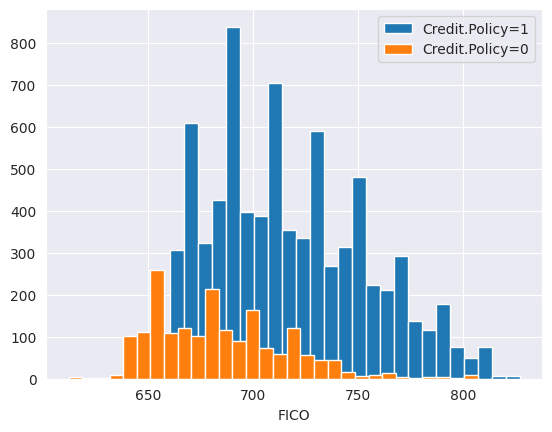

In [15]:
sns.set_style('darkgrid')
plt.hist(df['fico'].loc[df['credit.policy']==1], bins=30, label='Credit.Policy=1')
plt.hist(df['fico'].loc[df['credit.policy']==0], bins=30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

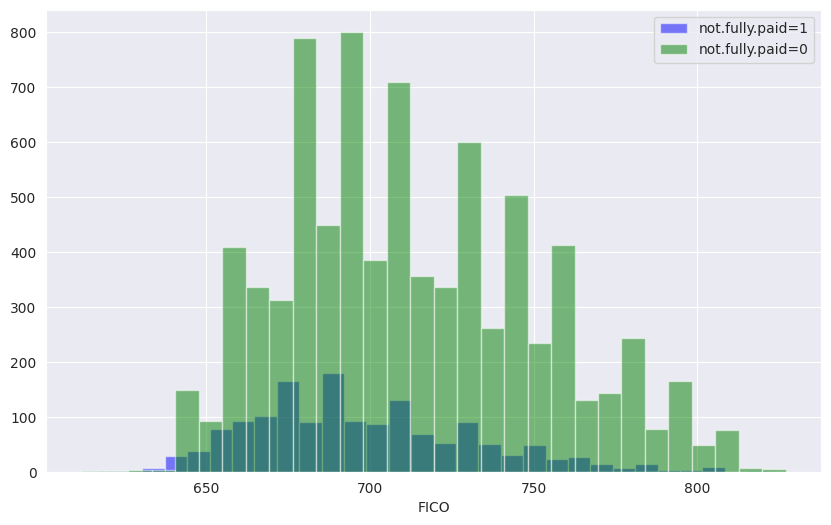

In [16]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, color='green', label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<Axes: xlabel='purpose', ylabel='count'>

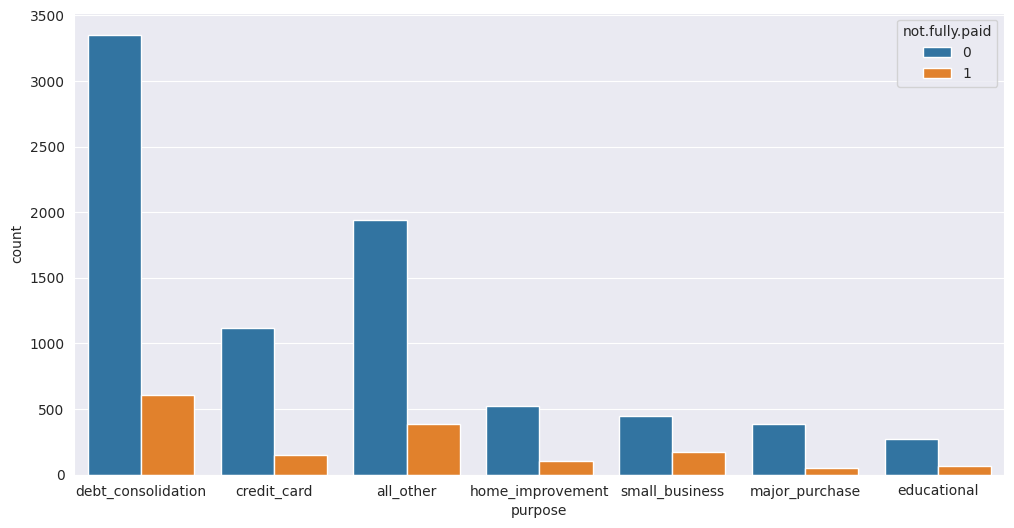

In [17]:
#creating a countplot to see the counts of purpose of loans by not.fully.paid
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='purpose', hue='not.fully.paid')

<Figure size 1000x600 with 0 Axes>

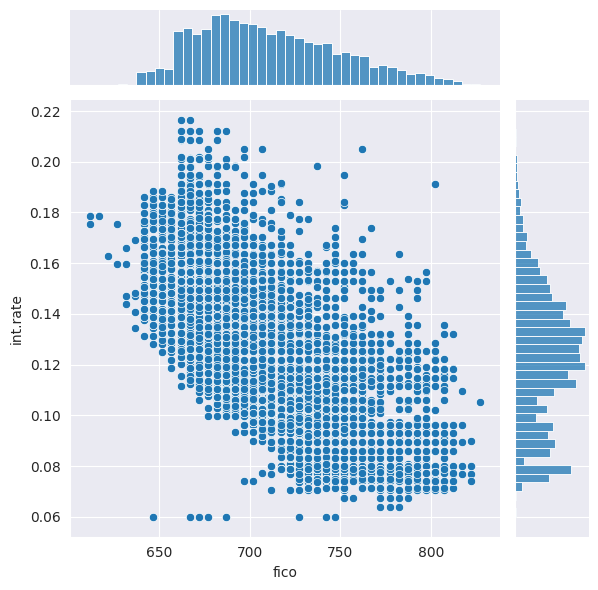

In [18]:
#checking the trend between FICO and the interest rate
plt.figure(figsize=(10,6))
sns.jointplot(x='fico', y='int.rate', data=df)

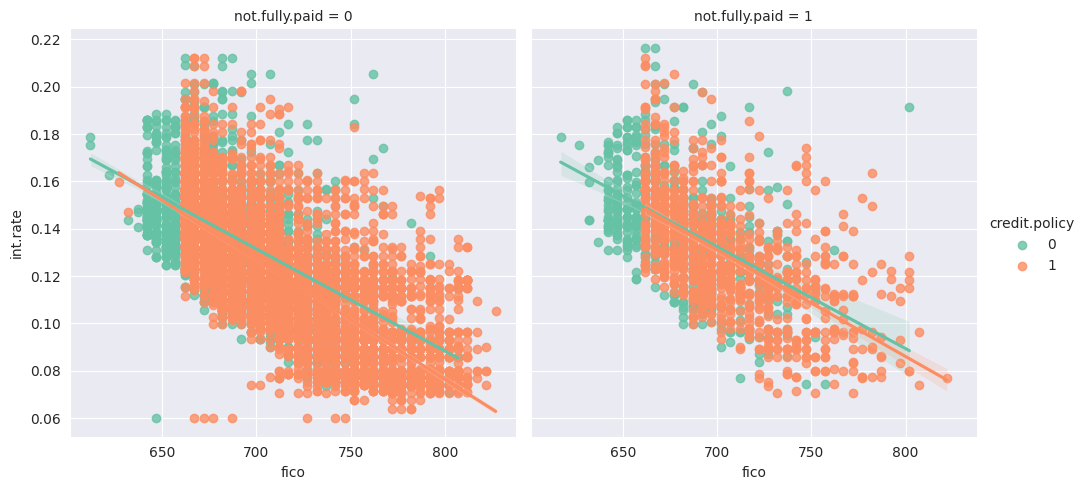

In [19]:
#understanding the relationship between credit.policy and not.fully.paid
sns.lmplot(data=df, x='fico', y='int.rate', hue='credit.policy', col='not.fully.paid', palette='Set2')

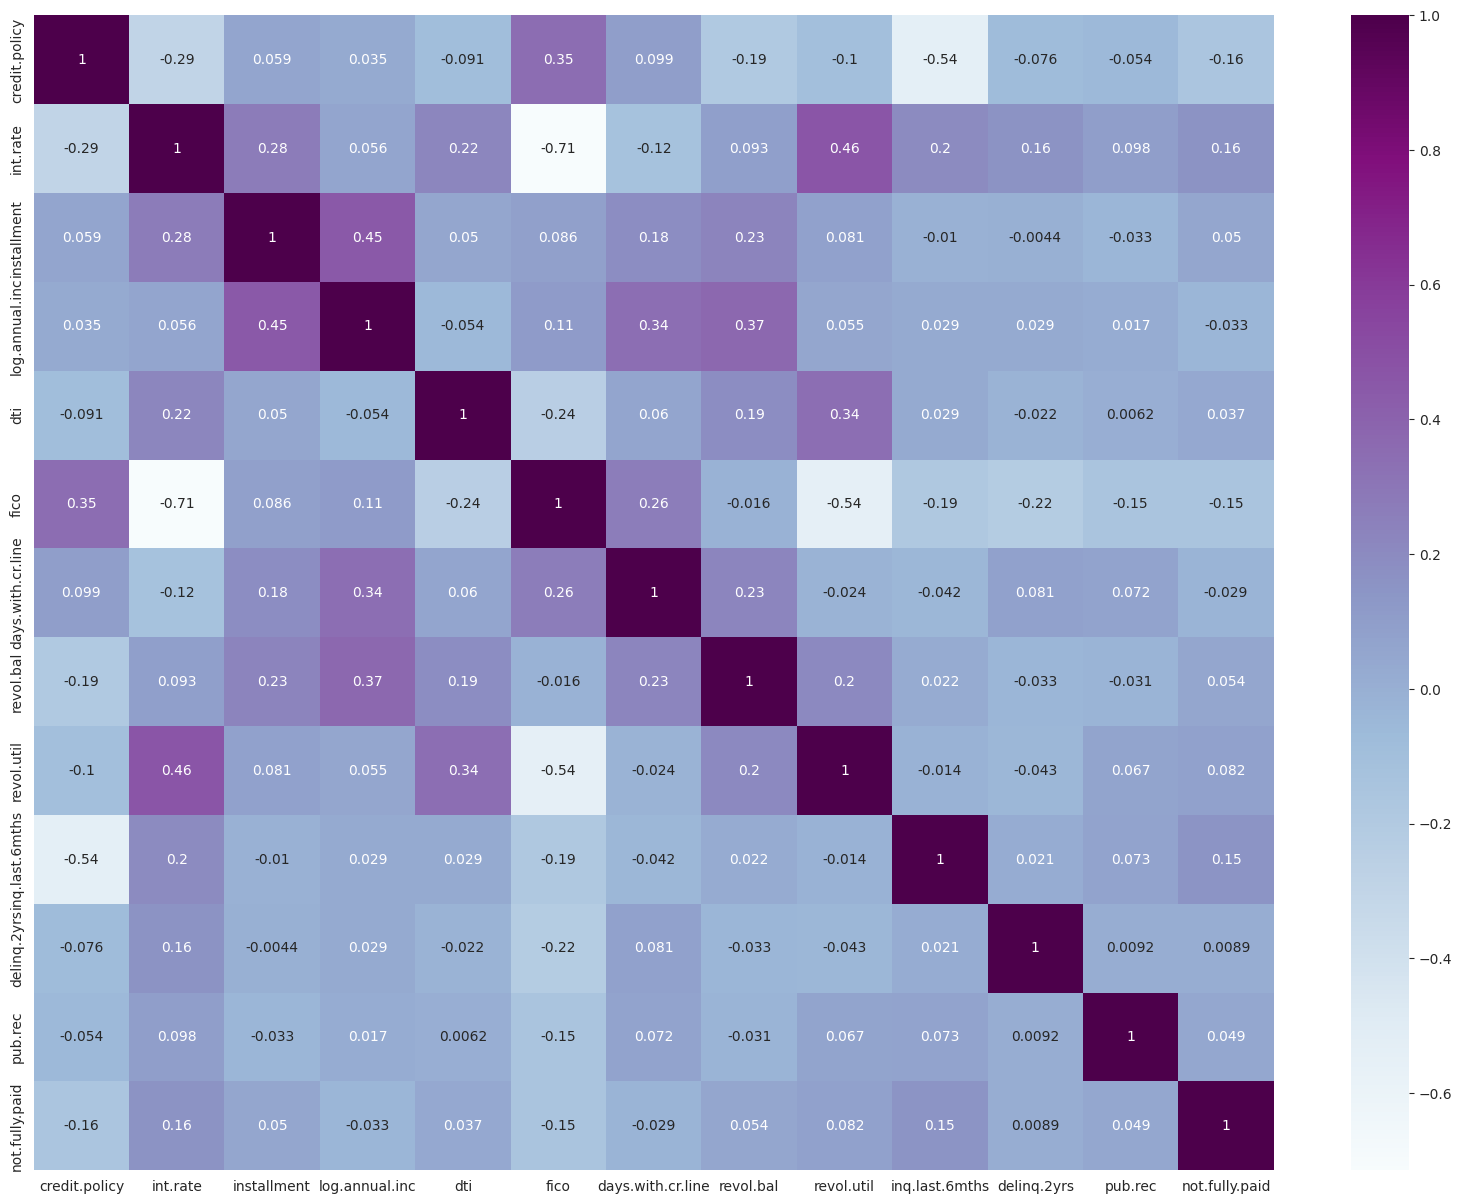

In [22]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.select_dtypes(include='number').corr(), cmap='BuPu', annot=True)
plt.show()


We can see that **init rate, credit policy, fico and inq.last.6mths** has corresponding grater impact on target class(not.gully.paid)



### Train-Test Split

Splitting the dataset for training and testing purpose.

In [23]:
# Dropping target class

X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

# Modellng

## Decision Tree

In [29]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Identify categorical columns
categorical_cols = X_train.select_dtypes(include='object').columns

# Step 2: Create preprocessing transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Keep numeric columns unchanged
)

# Step 3: Create pipeline with preprocessing + classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('clf', DecisionTreeClassifier())
])

# Step 4: Set up parameter grid and cross-validation
param_grid = {'clf__max_depth': [2, 3, 4, 5, 6, 8, 10, 15, 20]}
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='recall_weighted',
    cv=kfold,
    return_train_score=True
)

# Step 5: Fit model using GridSearchCV
grid_search.fit(X_train, y_train)

# Step 6: Make predictions with best estimator
best_model = grid_search.best_estimator_

y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Step 7: Evaluate performance
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("<-------------------Confusion Matrix------------------->\n")
print(confusion_matrix(y_test, y_pred_test))
print("\n")

print("<-------------------Classification Report------------------->\n")
print(classification_report(y_test, y_pred_test))
print("\n")

print("<-------------------Accuracy Scores------------------->\n")
print(f'Train Accuracy Score: {train_accuracy:.4f}')
print(f'Test Accuracy Score:  {test_accuracy:.4f}')

print("\n<-------------------Best Parameters from GridSearch------------------->")
print(grid_search.best_params_)


<-------------------Confusion Matrix------------------->

[[2431    0]
 [ 443    0]]


<-------------------Classification Report------------------->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.00      0.00      0.00       443

    accuracy                           0.85      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.72      0.85      0.78      2874



<-------------------Accuracy Scores------------------->

Train Accuracy Score: 0.8374
Test Accuracy Score:  0.8459

<-------------------Best Parameters from GridSearch------------------->
{'clf__max_depth': 2}


We got **Accuracy of 84.58%** using Decision Tree Classifier.

### **Bagging** with Decision Tree

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessor: encode categoricals, scale numericals
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Bagging classifier with base estimator
bag_dt = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=100,
    bootstrap=True,
    random_state=42
)

# Create pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', bag_dt)
])

# Cross-validation strategy
kFold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Cross-validate using weighted recall
score = cross_val_score(pipeline, X, y, scoring='recall_weighted', cv=kFold, n_jobs=-1)

print('Mean weighted recall score:', score.mean())


Mean weighted recall score: 0.8399457464283611


Bagging is not improving the score of model and giving only **73.10% of mean Score.**

### **AdaBoosting** with Decision Tree

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Identify categorical columns
categorical_cols = X_train.select_dtypes(include='object').columns.tolist()

# Step 2: Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'
)

# Step 3: Create AdaBoost pipeline
adaboost_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=2),
        learning_rate=0.5,
        n_estimators=50
    ))
])

# Step 4: Fit the pipeline
adaboost_pipeline.fit(X_train, y_train)

# Step 5: Evaluate performance
y_pred_train = adaboost_pipeline.predict(X_train)
y_pred_test = adaboost_pipeline.predict(X_test)

print("\n<---- Classification Report (Test Data) ---->\n")
print(classification_report(y_test, y_pred_test))

print("<---- Confusion Matrix ---->\n")
print(confusion_matrix(y_test, y_pred_test))

print("<---- Accuracy Scores ---->\n")
print("Train Accuracy: {:.2f}".format(accuracy_score(y_train, y_pred_train)))
print("Test Accuracy: {:.2f}".format(accuracy_score(y_test, y_pred_test)))



<---- Classification Report (Test Data) ---->

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.33      0.00      0.01       443

    accuracy                           0.85      2874
   macro avg       0.59      0.50      0.46      2874
weighted avg       0.77      0.85      0.78      2874

<---- Confusion Matrix ---->

[[2427    4]
 [ 441    2]]
<---- Accuracy Scores ---->

Train Accuracy: 0.84
Test Accuracy: 0.85


It giving the same result of **84%** and not improving our Model.

## Random Forest Classifier

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assume df is already loaded
# Check column names if you're unsure
# print(df.columns)

# Target column fix: ensure it's actually in the dataframe
# You may need to adjust this to match the actual target column
target_col = 'not.fully.paid'  # Change if needed
assert target_col in df.columns, f"{target_col} not found in DataFrame columns"

# Separate features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# Convert categorical features to numeric (e.g., 'purpose', 'grade', etc.)
X_encoded = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Train model
rf_clf = RandomForestClassifier(n_estimators=600)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Evaluation
print("<------------------- Confusion Matrix ------------------->\n")
print(confusion_matrix(y_test, y_pred_test))

print("\n<------------------- Classification Report ------------------->\n")
print(classification_report(y_test, y_pred_test))

print("\n<------------------- Accuracy Scores ------------------->\n")
print('Train Accuracy Score:', train_accuracy)
print('Test Accuracy Score :', test_accuracy)


<------------------- Confusion Matrix ------------------->

[[2395   13]
 [ 457    9]]

<------------------- Classification Report ------------------->

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.41      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.62      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874


<------------------- Accuracy Scores ------------------->

Train Accuracy Score: 1.0
Test Accuracy Score : 0.8364648573416841


We got the **Accuracy of 84.7%** with random Forest Classifier

### AdaBoosting with RandomForest

In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Use a RandomForestClassifier as base estimator
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# AdaBoostClassifier with RandomForest as estimator
adaboost_clf = AdaBoostClassifier(estimator=rf_clf, learning_rate=0.5, n_estimators=50, random_state=42)

# Train the AdaBoost classifier
adaboost_clf.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = adaboost_clf.predict(X_train)
y_test_pred = adaboost_clf.predict(X_test)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Training Accuracy: 1.0
Test Accuracy: 0.837508698677801

Classification Report (Test):
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.48      0.03      0.05       466

    accuracy                           0.84      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.78      0.84      0.77      2874


Confusion Matrix:
 [[2394   14]
 [ 453   13]]


### Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the classifier
gb_clf = GradientBoostingClassifier(learning_rate=0.05)
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred_train = gb_clf.predict(X_train)
y_pred_test = gb_clf.predict(X_test)

# Accuracy scores
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

# Output results
print("Confusion Matrix \n", confusion_matrix(y_test, y_pred_test))
print("\n<------------------- Classification Report ---------------------->\n")
print(classification_report(y_test, y_pred_test))
print("\n<--------------- Accuracy Scores ------------------->\n")
print('Train Accuracy score:', train_accuracy)
print('Test Accuracy score:', test_accuracy)


Confusion Matrix 
 [[2398   10]
 [ 459    7]]

<------------------- Classification Report ---------------------->

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.41      0.02      0.03       466

    accuracy                           0.84      2874
   macro avg       0.63      0.51      0.47      2874
weighted avg       0.77      0.84      0.77      2874


<--------------- Accuracy Scores ------------------->

Train Accuracy score: 0.8468078758949881
Test Accuracy score: 0.8368128044537231
